# Libraries

In [1]:
library(tidyverse)
library(dagitty)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

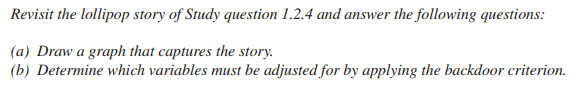

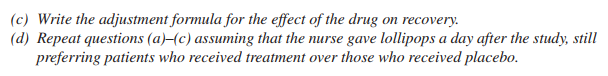

Study Question 1.2.4:

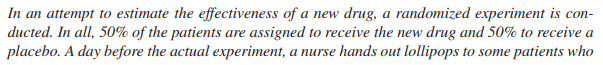

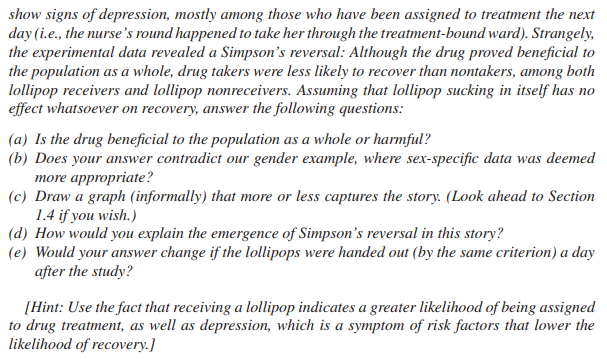

# Solution

## (a)

Let:

* $X$: Treatment received
* $Z$: Lollipop received
* $Y$: Recovery
* $U_1$, $U_2$: Unobserved factors

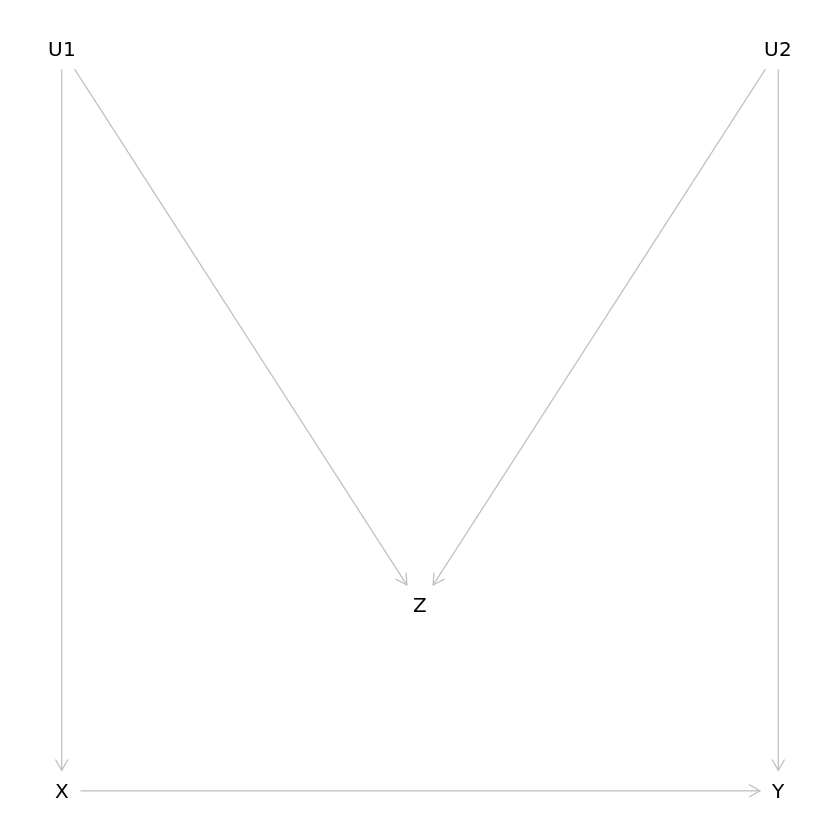

In [2]:
g = dagitty('dag {
    U1 -> Z
    U1 -> X
    U2 -> Z
    U2 -> Y
    X -> Y

    U1 [unobserved]
    U2 [unobserved]
    X [exposure]
    Y [outcome]
}')

coordinates( g ) <-
    list( x=c(U1=0, U2=2, X=0, Y=2, Z=1),
          y=c(U1=-2, U2=-2, X=0, Y=0, Z=-0.5))

# plot(graphLayout(g))
plot(g)

In [3]:
latents(g)

[1] "U1" "U2"

In [4]:
exposures(g)

[1] "X"

In [5]:
outcomes(g)

[1] "Y"


## (b)

In [6]:
adjustmentSets(g)

 {}

In [7]:
paths(g)

$paths
[1] "X -> Y"                  "X <- U1 -> Z <- U2 -> Y"

$open
[1]  TRUE FALSE

In [8]:
isCollider(g, "U1", "Z", "U2")

[1] TRUE

The adjustment set is the empty set because the only backdoor path from $X$ to $Y$ has a collider in it $(Z)$. 

## (c)

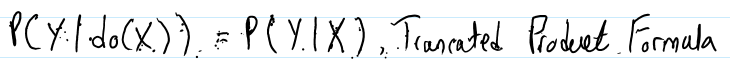

## (d)

Based on the causal graph in (a), the answer does not change because lolipop does not affect whether a person receives a treatment or whether a person recovers i.e. Z is not an ancestor of $X$ or $Y$.